# Auteur: Froment Lorenzo

# TP 3 : Random Walk Kernel

Ce notebook montre comment calculer le Noyau Random Walk pour comparer des graphes.


## Question 1


## Étape 1 : Définir et Visualiser les Graphes
Nous définissons trois graphes (\(G\), \(G'\), \(G''\)) et les visualisons pour comprendre leur structure.


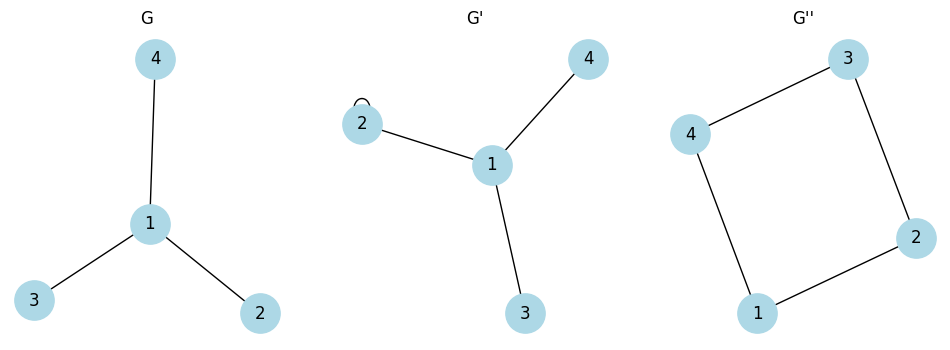

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

def draw_graphs(graphs, titles):
    fig, axes = plt.subplots(1, len(graphs), figsize=(12, 4))
    for ax, graph, title in zip(axes, graphs, titles):
        nx.draw(graph, ax=ax, with_labels=True, node_color="lightblue", node_size=800)
        ax.set_title(title)
    plt.show()

G = nx.Graph([(1, 2), (1, 3), (1, 4)])
G_prime = nx.Graph([(1, 2), (1, 3), (1, 4),(2,2)])
G_double_prime = nx.Graph([(1,2),(2,3),(3,4),(4,1)])

draw_graphs([G, G_prime, G_double_prime], ["G", "G'", "G''"])

## Étape 2 : Calcul de la Matrice d’Adjacence pour le Direct Product Graph
Pour calculer le Random Walk Kernel, nous construisons le Direct Product Graph à partir des graphes \(G\) et \(G'\). Cela consiste à combiner leurs matrices d’adjacence pour créer une nouvelle matrice représentant les relations dans le graphe produit.

Cette matrice d’adjacence résultante est ensuite utilisée pour effectuer les calculs du kernel.

La formule utilisée est la suivante :

$$ k_X(G, G') = \sum_{i,j=1}^{|V_X|} \sum_{k=0}^4 (A_X^k)_{ij} $$

où \( A_X \) représente la matrice d’adjacence du Direct Product Graph.


In [2]:
def direct_product_adjacency(G1, G2):
    adj1 = nx.adjacency_matrix(G1).toarray()
    adj2 = nx.adjacency_matrix(G2).toarray()
    n1, n2 = adj1.shape[0], adj2.shape[0]
    product_size = n1 * n2
    adj_product = np.zeros((product_size, product_size))
    
    for (i1, j1), (i2, j2) in product(np.ndindex(n1, n1), np.ndindex(n2, n2)):
        if adj1[i1, j1] and adj2[i2, j2]:
            idx1 = i1 * n2 + i2
            idx2 = j1 * n2 + j2
            adj_product[idx1, idx2] = 1
    
    return adj_product
print("Ax : ")
direct_product_adjacency(G,G_double_prime)


Ax : 


array([[0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

## Étape 3 : Calcul du Random Walk Kernel
Nous calculons la valeur du kernel pour les paires de graphes données en utilisant des marches de longueurs \( k = 0, 1, 2, 3, 4 \).


In [3]:
def random_walk_kernel(G1, G2, max_k=4):
    adj_product = direct_product_adjacency(G1, G2)
    result = 0
    current_power = np.eye(len(adj_product))
    for k in range(max_k + 1):
        result += current_power.sum()
        current_power = np.dot(current_power, adj_product)
    return result

# Calculate kernels
kernel_G_G_prime = random_walk_kernel(G, G_prime)
kernel_G_prime_G_double_prime = random_walk_kernel(G_prime, G_double_prime)

print("Random walk kernel value => kX(G, G'):", kernel_G_G_prime)
print("Random walk kernel value => kX(G', G''):", kernel_G_prime_G_double_prime)

Random walk kernel value => kX(G, G'): 2866.0
Random walk kernel value => kX(G', G''): 4984.0


**(La valeur parrait grande mais pour être sur de ma fonction j'ai fait le calcul sur excel pour G,G' et je suis tombé sur 2866 donc je pense que ma fonction est correcte)**

# Question 2

## Etape 4: Discussion des résultats du Random Walk Kernel

### 1. Analyse de \(kX(G, G') = 2866.0\)
- **Graphes** :
  - \(G\) : Un graphe étoile avec un nœud central connecté à trois autres nœuds \((1, 2), (1, 3), (1, 4)\).
  - \(G'\) : Semblable à \(G\), mais avec une boucle ajoutée sur le nœud \(2\) (\((2, 2)\)).
- **Interprétation** :
  - Ces deux graphes sont structurellement très similaires. La principale différence réside dans la boucle sur le nœud \(2\) dans \(G'\), qui augmente les possibilités de marches aléatoires.
  - Le score de \(2866.0\) reflète cette similitude. Cependant, la boucle sur le nœud \(2\) introduit davantage de chemins possibles, augmentant légèrement le score.

---

### 2. Analyse de \(kX(G', G'') = 4984.0\)
- **Graphes** :
  - \(G'\) : Graphe étoile avec une boucle sur le nœud \(2\).
  - \(G''\) : Un graphe cyclique avec les arêtes \((1, 2), (2, 3), (3, 4), (4, 1)\).
- **Interprétation** :
  - Bien que ces deux graphes soient moins similaires structurellement (étoile vs cycle), ils partagent des caractéristiques qui augmentent leur score de kernel.
  - Les cycles dans \(G''\) permettent des marches aléatoires infinies sur des boucles, ce qui contribue fortement au score. De plus, la boucle sur \(2\) dans \(G'\) augmente aussi les chemins locaux possibles.
  - Le score \(4984.0\) est plus élevé que celui entre \(G\) et \(G'\), car les cycles dans \(G''\) enrichissent significativement les possibilités de marches.

---

### 3. Conclusion comparative des scores
- Le score entre \(G\) et \(G'\) (\(2866.0\)) est inférieur à celui entre \(G'\) et \(G''\) (\(4984.0\)).
- Cela montre que le **Random Walk Kernel** est sensible à la présence de cycles et de boucles dans les graphes.
- Ces éléments augmentent le nombre de chemins possibles pour les marches aléatoires, ce qui amplifie la similarité mesurée.



# Question 3

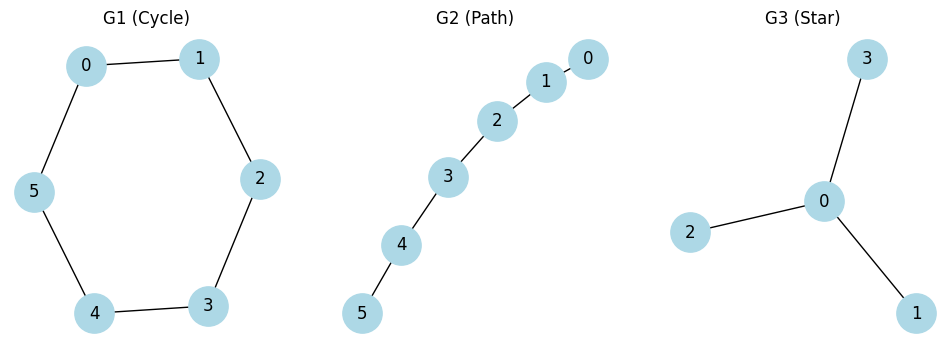

Kernel kX(G1, G2): 7692.0
Kernel kX(G1, G3): 4704.0


In [5]:
def experiment():
    G1 = nx.cycle_graph(6)
    G2 = nx.path_graph(6)
    G3 = nx.star_graph(3)

    draw_graphs([G1, G2, G3], ["G1 (Cycle)", "G2 (Path)", "G3 (Star)"])

    kernel_1_2 = random_walk_kernel(G1, G2)
    kernel_1_3 = random_walk_kernel(G1, G3)

    print("Kernel kX(G1, G2):", kernel_1_2)
    print("Kernel kX(G1, G3):", kernel_1_3)

experiment()

## Discussion des résultats

### Structure des graphes
1. **\(G_1\) (Cycle)** :
   - Graphe cyclique avec 6 nœuds connectés en boucle.
   - Offre de nombreuses marches aléatoires grâce aux cycles, permettant des chemins récurrents.

2. **\(G_2\) (Path)** :
   - Graphe linéaire avec 6 nœuds connectés séquentiellement.
   - Les marches aléatoires sont limitées à une progression linéaire sans possibilité de retour sur un cycle.

3. **\(G_3\) (Star)** :
   - Graphe étoile avec un nœud central connecté à 4 autres nœuds.
   - Les marches aléatoires convergent toujours vers ou depuis le nœud central, limitant la diversité des chemins.

### Résultats obtenus
1. **\(k_X(G_1, G_2) = 7692.0** :
   - Score élevé, car \(G_1\) et \(G_2\) partagent des similarités locales malgré leurs différences globales.
   - Les chemins sur de courtes distances sont proches dans les deux graphes.

2. **\(k_X(G_1, G_3) = 4704.0** :
   - Score plus faible, car \(G_3\) est structurellement très différent de \(G_1\).
   - \(G_3\) est fortement centralisé, ce qui limite les marches aléatoires riches et diversifiées.

### Discussion
- Le Random Walk Kernel est sensible aux similarités structurelles locales. Par conséquent, \(G_1\) (Cycle) et \(G_2\) (Path) obtiennent un score élevé en raison de leurs portions locales similaires.
- Les différences globales (cycle vs étoile) expliquent la diminution significative du score entre \(G_1\) et \(G_3\), car les chemins disponibles dans \(G_3\) sont plus restreints.
- Cette analyse montre que le kernel favorise les graphes avec des marches diversifiées et récurrentes.

---
